# Importar las librerías necesarias


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Image
from sklearn.datasets import make_blobs

# Definir funciones de activación y sus derivadas


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)



# Crear el dataset XOR


In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])



# Inicializar los pesos y biases aleatoriamente


In [6]:
np.random.seed(1)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

W1 = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
b1 = np.random.uniform(size=(1, hidden_layer_neurons))
W2 = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
b2 = np.random.uniform(size=(1, output_neurons))



# Parámetros de entrenamiento


In [7]:
learning_rate = 0.5
iterations = 10000



# Almacenar los valores de salida en cada iteración para la animación


In [8]:
outputs_over_time = []



# Entrenamiento mediante retropropagación


In [9]:
for i in range(iterations):
    # Propagación hacia adelante
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_activation = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_activation, W2) + b2
    predicted_output = sigmoid(output_layer_input)
    
    # Guardar el resultado para la animación
    outputs_over_time.append(predicted_output)
    
    # Cálculo del error
    error = y - predicted_output
    
    # Propagación hacia atrás
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)
    
    # Actualizar los pesos y biases
    W2 += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    b2 += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate



# Animación para visualizar el ajuste de la red conforme avanza el entrenamiento


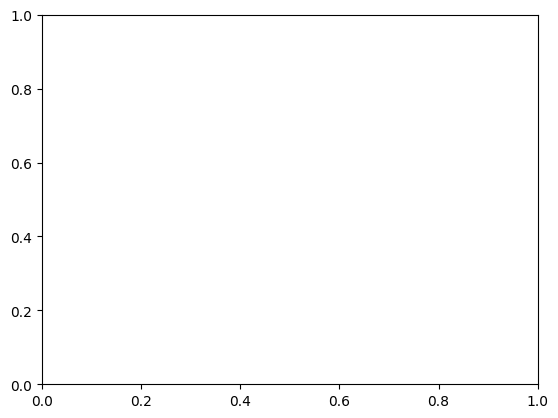

In [10]:
fig, ax = plt.subplots()

def update(num):
    ax.clear()
    ax.set_title(f'Iteración {num + 1}')
    
    # Obtener las predicciones actuales
    predictions = outputs_over_time[num]
    
    # Mapear colores de predicciones para la animación
    colors = ['blue' if p < 0.5 else 'red' for p in predictions]
    
    # Dibujar los puntos
    ax.scatter([0, 1], [0, 0], c=colors[:2], cmap='coolwarm', s=200, edgecolor='k')
    ax.scatter([0, 1], [1, 1], c=colors[2:], cmap='coolwarm', s=200, edgecolor='k')
    
    # Definir límites del gráfico
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.grid(True)
    
    return ax


/var/folders/y_/qfyfmtlx0dd71kh2qt_dvv100000gn/T/ipykernel_2544/2836846043.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([0, 1], [0, 0], c=colors[:2], cmap='coolwarm', s=200, edgecolor='k')
/var/folders/y_/qfyfmtlx0dd71kh2qt_dvv100000gn/T/ipykernel_2544/2836846043.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([0, 1], [1, 1], c=colors[2:], cmap='coolwarm', s=200, edgecolor='k')


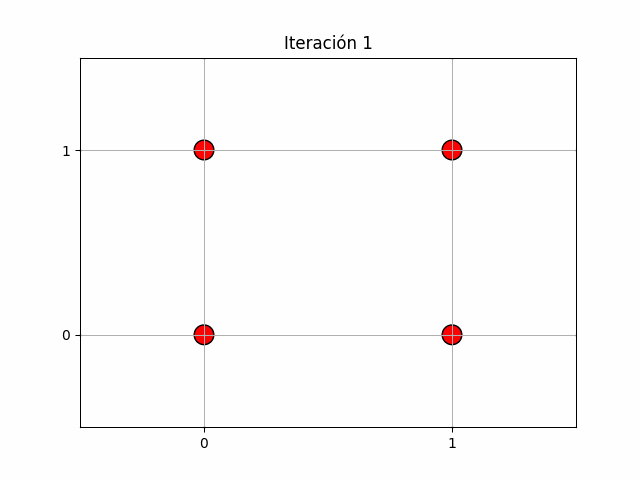

In [11]:
# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=range(0, iterations, 200), repeat=False)

# Guardar la animación como gif
ani.save("xor_animation.gif", writer='pillow', fps=5)

# Mostrar la animación en el notebook
Image(filename="xor_animation.gif")